In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [ ]:
# 모든데이터 출력
#pd.set_option('display.max_rows',None)

In [163]:
# df=glob('data/서울특별시 공공자전거 이용정보(시간대별)_20*.csv')
# df_total=[]
# for i in df:
#     df_total.append(pd.read_csv(i,encoding='utf-8'))



In [189]:
# test=pd.concat(df_total,axis=0)

In [169]:
# test.to_csv('data/total.csv')

# 성별/연령

## 전처리

In [114]:
test=pd.read_csv('data/total_1.csv',index_col=0)

In [115]:
pd.pivot_table(test,index='성별',aggfunc='count')

,대여시간,연령대코드,이용건수
성별,,,
F,3733586,3733586,3733586
M,5788591,5788591,5788591
f,3047,3047,3047
m,4823,4823,4823


In [ ]:
t=[]
for i in test.대여시간:
    i=str(i)
    if len(i)==1:
        t.append('0'+i)
    else :
        t.append(i)

test['대여시간']=t
test

In [8]:
test['시간대']=['출/퇴근' if i=='07' or i=='08' or i=='09' or i=='17' or i=='18' or i=='19' else '출/퇴근 외' for i in test['대여시간']]

In [9]:
test.fillna('미기입',inplace=True)

In [10]:
a=test['성별']

In [11]:
b=[i.upper() for i in a]

In [12]:
test['성별']=b

In [13]:
test.to_csv('data/test0823.csv')

## 성별 이용건수

In [110]:
test=pd.read_csv('data/test0823.csv',index_col=0)

In [71]:
sex=pd.pivot_table(test,index=['연령대코드','성별'],values='이용건수',aggfunc='sum')

In [72]:
sex

이용건수
연령대코드 성별          
20대   F    2100239
      M    2396664
      미기입  6188092
30대   F    1071582
      M    1768193
      미기입  2495780
40대   F     553687
      M    1193598
      미기입  1624723
50대   F     301393
      M     666692
      미기입   960497
60대   F      59346
      M     196209
      미기입   235937
70대~  F      24083
      M      33558
      미기입    29646
~10대  F     185674
      M     342167
      미기입   843987

In [80]:
sex2=sex.reset_index()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='연령대코드', ylabel='이용건수'>

Text(0.5, 0, '연령대')

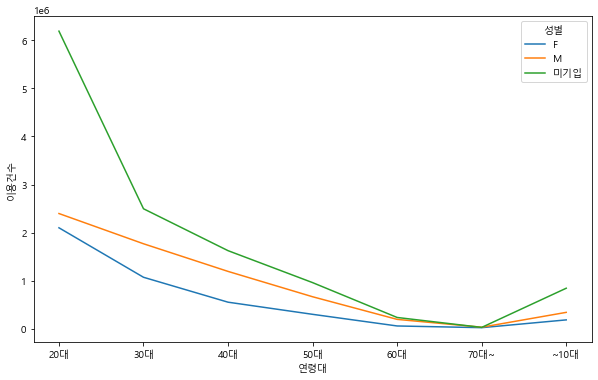

In [74]:
plt.figure(figsize=(10,6))
sns.lineplot(x='연령대코드',y='이용건수',hue='성별',data=sex2)
plt.xlabel('연령대')

In [81]:
sex3=sex2[sex2['성별']!='미기입']
sex3

,연령대코드,성별,이용건수
0,20대,F,2100239
1,20대,M,2396664
3,30대,F,1071582
4,30대,M,1768193
6,40대,F,553687
7,40대,M,1193598
9,50대,F,301393
10,50대,M,666692
12,60대,F,59346
13,60대,M,196209


In [105]:
sex3['연령/성별 이용비중']=(sex3['이용건수']/sex3['이용건수'].sum()*100).round(2)
sex3

,연령대코드,성별,이용건수,연령/성별 이용비중
0,20대,F,2100239,19.28
1,20대,M,2396664,22.00
3,30대,F,1071582,9.84
4,30대,M,1768193,16.23
6,40대,F,553687,5.08
7,40대,M,1193598,10.96
9,50대,F,301393,2.77
10,50대,M,666692,6.12
12,60대,F,59346,0.54
13,60대,M,196209,1.80


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='연령대코드', ylabel='이용건수'>

Text(0.5, 0, '연령대')

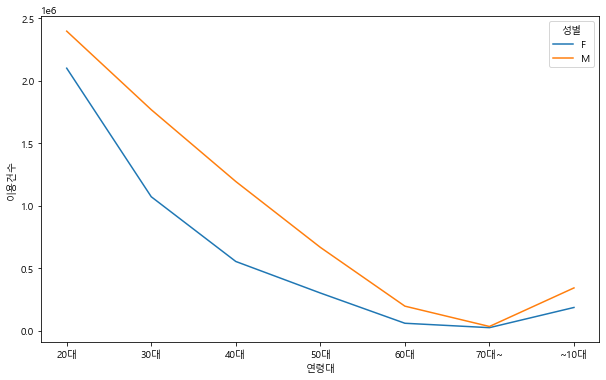

In [106]:
# 연령대에 따른 성별 이용건수
plt.figure(figsize=(10,6))
sns.lineplot(x='연령대코드',y='이용건수',hue='성별',data=sex3)
plt.xlabel('연령대')

In [109]:
gender=pd.pivot_table(test,index='대여시간',columns='성별',values='이용건수',aggfunc='sum')
gender

성별,F,M,미기입
대여시간,,,
0,67593,217069,365492
1,41661,174322,280746
2,25947,122217,192320
3,16704,84474,131658
4,12778,58434,87093
5,19397,56562,89365
6,41442,113134,164451
7,119540,255249,386394
8,236110,375161,632959


<AxesSubplot:xlabel='대여시간'>

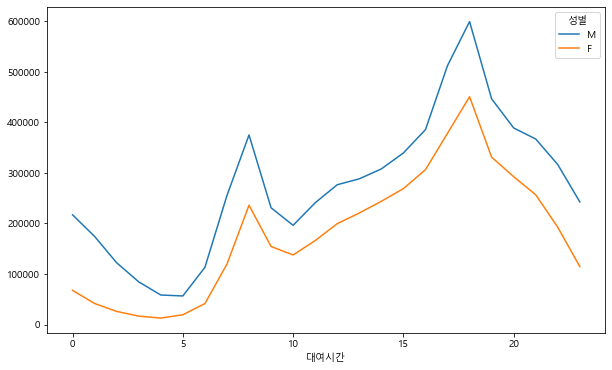

In [86]:
# 대여시간에 따른 성별 이용건수
gender2=gender[['M','F']]
gender2.plot(figsize=(10,6))

## 시간대/연령대별

In [87]:
pt=pd.pivot_table(test,index=['연령대코드'],values='이용건수',aggfunc='sum')

In [88]:
# 연령별 이용건수 비율
prob=(pt/pt.sum()*100).round(2)
pt['연령별 이용건수 비중']=prob

In [89]:
pt

,이용건수,연령별 이용건수 비중
연령대코드,,
20대,10684995,45.91
30대,5335555,22.93
40대,3372008,14.49
50대,1928582,8.29
60대,491492,2.11
70대~,87287,0.38
~10대,1371828,5.89


In [90]:
tt=pd.pivot_table(test,index=['연령대코드','시간대'],values='이용건수',aggfunc='sum').reset_index()

In [95]:
tt['시간대/연령 이용비율']=(tt[['이용건수']]/tt[['이용건수']].sum()*100).round(2)

In [94]:
tt['시간 당 이용건수']=(tt['이용건수']/pd.Series(([6,18]*7))).astype(int)

In [96]:
tt

,연령대코드,시간대,이용건수,시간대/연령 이용비율,시간 당 이용건수
0,20대,출/퇴근,3691558,15.86,615259
1,20대,출/퇴근 외,6993437,30.05,388524
2,30대,출/퇴근,2228206,9.57,371367
3,30대,출/퇴근 외,3107349,13.35,172630
4,40대,출/퇴근,1400310,6.02,233385
5,40대,출/퇴근 외,1971698,8.47,109538
6,50대,출/퇴근,698107,3.00,116351
7,50대,출/퇴근 외,1230475,5.29,68359
8,60대,출/퇴근,153518,0.66,25586
9,60대,출/퇴근 외,337974,1.45,18776


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='연령대코드', ylabel='시간 당 이용건수'>

Text(0.5, 0, '연령대')

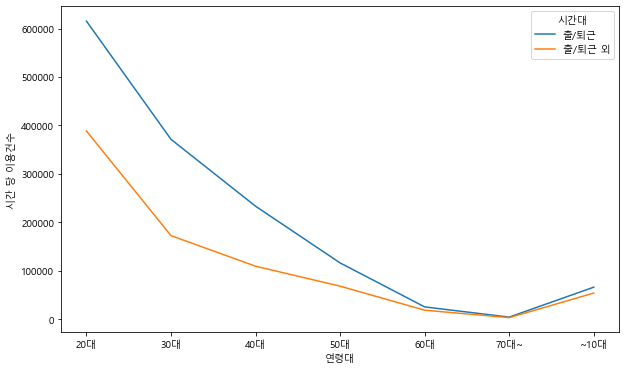

In [97]:
plt.figure(figsize=(10,6))
sns.lineplot(x='연령대코드',y='시간 당 이용건수',hue='시간대',data=tt)
plt.xlabel('연령대')

In [80]:
tt2=tt

In [81]:
tt2['연령대코드']=['10대 이전' if i=='~10대' else i for i in tt['연령대코드']]

In [82]:
tt2=tt2.sort_values('연령대코드')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='연령대코드', ylabel='시간 당 이용건수'>

Text(0, 0.5, '시간 당 이용건수')

Text(0.5, 0, '연령대')

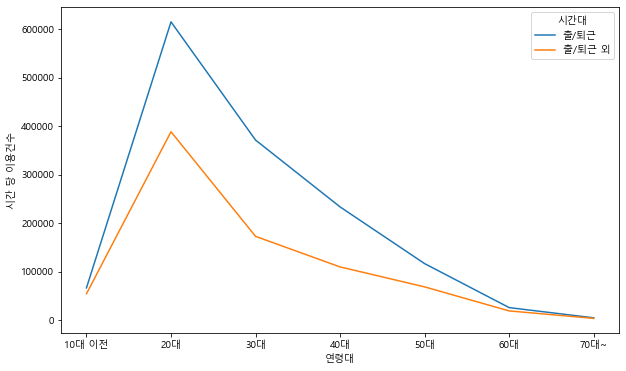

In [86]:
plt.figure(figsize=(10,6))
sns.lineplot(x='연령대코드',y='시간 당 이용건수',hue='시간대',data=tt2)
plt.ylabel('시간 당 이용건수')
plt.xlabel('연령대')

In [111]:
age=pd.pivot_table(test,index='대여시간',columns='연령대코드',values='이용건수',aggfunc='sum')
age

연령대코드,20대,30대,40대,50대,60대,70대~,~10대
대여시간,,,,,,,
0,343585,107050,63135,58262,16528,2280,59314
1,235345,73643,58360,66709,20557,2540,39575
2,152502,46509,43529,54673,17721,1939,23611
3,94952,31563,33549,42242,14017,1450,15063
4,61917,23561,24898,28398,9186,822,9523
5,60592,33718,29274,24814,8564,1296,7066
6,94621,75803,75610,46845,14483,2226,9439
7,221756,209831,176366,97656,20792,2997,31785
8,471201,366234,242871,115620,22970,4367,20967


<AxesSubplot:xlabel='대여시간'>

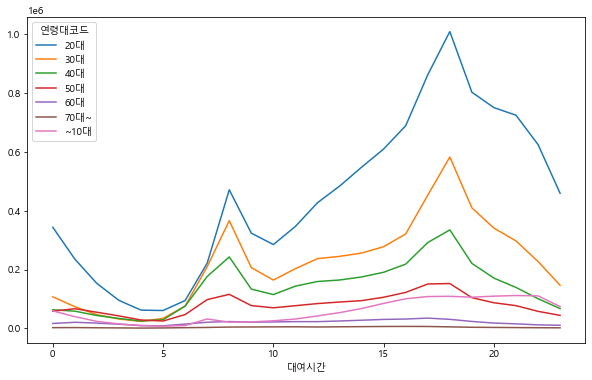

In [99]:
age.plot(figsize=(10,6))